In [17]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [18]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [21]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [22]:
 df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [23]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to Find Optimal K

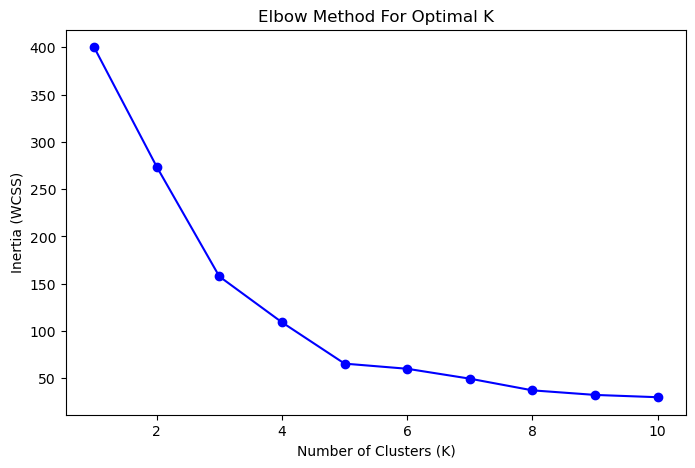

In [25]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Optimal K')
plt.show()

# Fit KMeans and Assign Labels

In [26]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [28]:
#  Evaluate with Silhouette Score
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score for K={optimal_k}: {sil_score:.4f}')

Silhouette Score for K=5: 0.5547


# Visualize Clusters

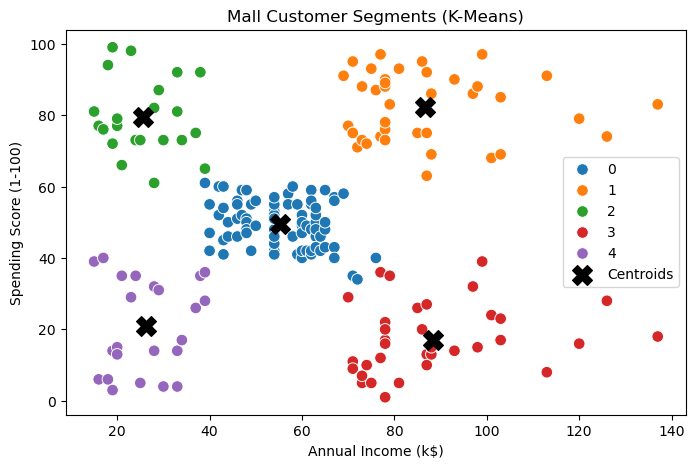

In [31]:
# Recover mean and std for proper conversion
ai_mean = X['Annual Income (k$)'].mean()
ai_std = X['Annual Income (k$)'].std()
ss_mean = X['Spending Score (1-100)'].mean()
ss_std = X['Spending Score (1-100)'].std()

centers_unscaled = np.column_stack([
    kmeans.cluster_centers_[:, 0] * ai_std + ai_mean,
    kmeans.cluster_centers_[:, 1] * ss_std + ss_mean
])

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10', s=70)
plt.scatter(centers_unscaled[:, 0], centers_unscaled[:, 1], c='black', s=200, marker='X', label='Centroids')
plt.legend()
plt.title('Mall Customer Segments (K-Means)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

#  PCA Visualization

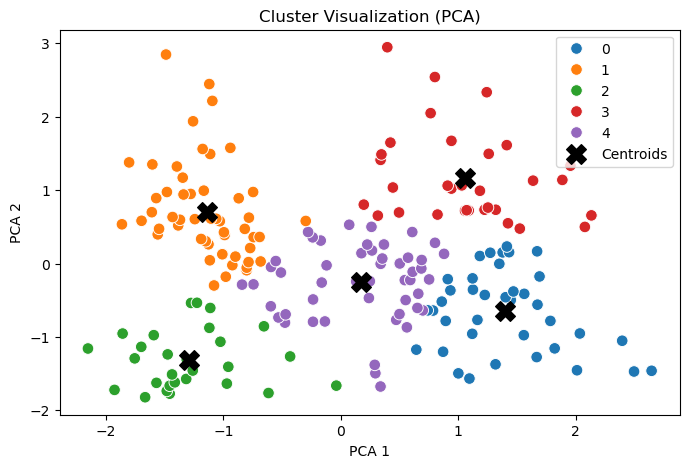

In [32]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X_all = df[features]
X_all_scaled = scaler.fit_transform(X_all)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_all_scaled)
kmeans_pca = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_pca, palette='tab10', s=70)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.legend()
plt.title('Cluster Visualization (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()